In [1]:
import mshr
from dolfin import *
import matplotlib.pyplot as plt
import numpy as np

[Take a look at mhsr API](https://bitbucket.org/fenics-project/mshr/wiki/API)

In [2]:
ra = 1
square = mshr.Rectangle(Point(-ra*np.sqrt(2)/2,-ra*np.sqrt(2)/2), Point(ra*np.sqrt(2)/2,ra*np.sqrt(2)/2))
diskT = mshr.Circle(Point(0,ra*np.sqrt(2)), ra)
diskB = mshr.Circle(Point(0,-ra*np.sqrt(2) ), ra)  
diskL = mshr.Circle(Point(-ra*np.sqrt(2) , 0), ra)
diskR = mshr.Circle(Point(ra*np.sqrt(2), 0), ra) 
dom1 = square + (diskR+ diskL) - (diskT+ diskB)
domain = mshr.CSGTranslation(dom1, Point(4*ra,0))
dom2 = mshr.Rectangle(Point(-ra,-ra/2), Point(ra,ra/2))
domain2 = mshr.CSGTranslation(dom2, Point(1.1*ra,0))

In [3]:
mesh = mshr.generate_mesh(domain, 50)

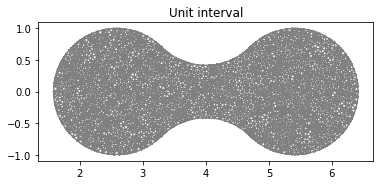

In [4]:
plot(mesh, title="Unit interval")

In [5]:
V = FunctionSpace(mesh, "Lagrange", 1)

In [6]:
def boundary(x, on_boundary):
    return on_boundary

In [7]:
bc = DirichletBC(V, Constant(0.0), boundary)

In [8]:
u0 = Constant(0.0)
weight = Constant(5.0)

In [9]:
u = TrialFunction(V)
v = TestFunction(V)
g = Expression("1/x[0]", degree=2)
a = inner(grad(u), grad(v))*dx - g*Dx(u, 0)*v*dx  
L = v*weight*dx  


In [10]:
u = Function(V)
solve(a == L, u, bc)

In [14]:
file = File("poisson_reg_D.pvd")
file << u

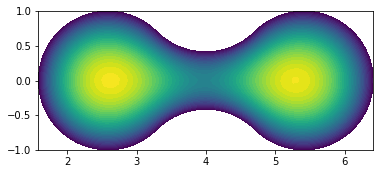

In [15]:
plot(u)
plt.show()

In [18]:
u

In [19]:
type(u)

dolfin.function.function.Function

In [79]:
u(1,0)-u(-1,0)

-0.00013552026743401946

In [100]:
tt = np.arange(0.0, 2, 0.1)
tt

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

In [101]:
z = [u(3+t,0)-u(3-t,0) for t in tt]

In [103]:
np.min(z)

-0.16615970802746116